In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import mpltern
import polyphase
plt.rcParams.update({"text.usetex": True})

Computation took 6.63s


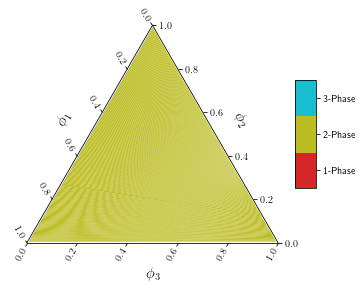

In [9]:
# compute phase diagram
systems={0:{'M':[789.266,11.36,1],'chi':[1.88,0.42,1.25]},
        1: {'M':[408.5,11.36,1],'chi':[1.33,0.34,1.25]}
        }
# M -- polymer, small molecule, solvent
# chi -- (p, sm);(p,solv);(solv, sm)
     
KEY = 0
f = lambda x : polyphase.flory_huggins(x, systems[KEY]['M'], systems[KEY]['chi'])
engine = polyphase.PHASE(f,200, len(systems[KEY]['M']))

engine.compute()
polyphase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

/projects/academic/olgawodo/kiranvad/Projects/Spring2020/PhaseModelling/polyphase/utils.py:51: RuntimeWarning: invalid value encountered in log
  T1 += (xi*np.log(xi))/M[i] + beta/xi


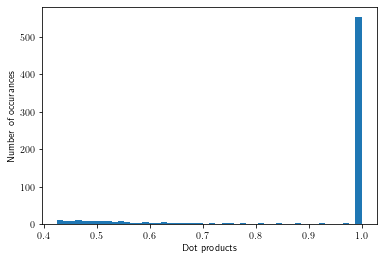

In [10]:
grad = polyphase.CentralDifference(engine.grid, f)
phase_simplices_ids = np.where(np.asarray(engine.num_comps)==2)[0]
outlist = []
for simplex_id in phase_simplices_ids:
    test = polyphase.TestAngles(engine,phase=2,simplex_id=simplex_id)
    test_out = test.get_angles(grad)
    for _, value in test_out['thetas'].items():
        outlist.append([value[2], value[3]])

outlist = np.asarray(outlist)        
assert len(outlist)==len(phase_simplices_ids)*3    
fig, ax = plt.subplots()
ax.hist(outlist[:,1],bins=50, density=False)
ax.set_ylabel('Number of occurances')
ax.set_xlabel('Dot products')
plt.show()

In [11]:
PHASE_ID = 2
phase_simplices_ids = np.where(np.asarray(engine.num_comps)==PHASE_ID)[0]
failed = []
criteria = engine.df.T['label']==PHASE_ID
lengths = []
for simplex_id in phase_simplices_ids:
    test = polyphase.TestPhaseSplits(engine,phase=PHASE_ID,simplex_id=simplex_id, threshold=0.05)
    if not test.check_centroid():
        failed.append(simplex_id)

print('{}/{} simplices failed the test'.format(len(failed), len(phase_simplices_ids))) 

0/244 simplices failed the test
